<a href="https://colab.research.google.com/github/lux-gw/STAT-6289---Deep-Learning/blob/master/Luxenberg_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN for CIFAR-10


In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Homework 2 - STAT 6289 - Deep Learning

# Train a simple CNN
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [23]:
print(os.getcwd())
os.chdir('drive/My Drive/Colab Notebooks')
print(os.getcwd())

/content
/content/drive/My Drive/Colab Notebooks


## Network Parameters

In [87]:
batch_size = 32
num_classes = 10
epochs = 10 # changed from 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

## Data Preparation

In [12]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [13]:
print(y_train.shape)
print(y_train)

(50000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [14]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
y_train.shape

(50000, 10)

## Build Model

In [85]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [88]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history_cnn = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.1546 - accuracy: 0.2028 - val_loss: 2.0250 - val_accuracy: 0.2616
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 2.0373 - accuracy: 0.2517 - val_loss: 1.9437 - val_accuracy: 0.2990
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 2.0013 - accuracy: 0.2639 - val_loss: 2.0301 - val_accuracy: 0.2628
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.9689 - accuracy: 0.2797 - val_loss: 1.8841 - val_accuracy: 0.3178
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.9202 - accuracy: 0.2976 - val_loss: 1.8450 - val_accuracy: 0.3414
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.8586 - accuracy: 0.3269 - val_loss: 1.7884 - val_accuracy: 0.3605
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.7922 - ac

In [89]:
# Save model and weights
model_name = 'keras_cifar10_trained_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at /content/drive/My Drive/Colab Notebooks/saved_models/keras_cifar10_trained_model.h5 


## Evaluate Model

In [90]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.5105 - accuracy: 0.4625
Test loss: 1.510535717010498
Test accuracy: 0.4625000059604645


# Question 1
Compare the accuracy of the CNN above to the accuracy of simple dense neural networks with 0, 1, 2, 3, and 4 hidden layers of 512 rectified linear units each. Modify the CNN code above to obtain simple dense neural networks with 0, 1, 2, 3, and 4 hidden layers of 512 rectified linear units (with a dropout rate of 0.5). Produce a graph that contains 6 curves (one for the CNN and one for each dense neural net of 0-4 hidden layers). The y-axis is the test (validation) accuracy and the x-axis is the number of epochs (# of passes through the training set). Produce curves for the first 10 epochs. Although 10 epochs is not sufficient to reach convergence, it is sufficient to see the trend. Explain the results (i.e. why some models perform better or worse than other models). 

In [43]:
# Dense Neural Network with 0 hidden layers
model_dense0 = Sequential()
model_dense0.add(Flatten())
model_dense0.add(Dense(num_classes))
model_dense0.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_dense0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    model_dense0.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history_dense0 = model_dense0.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 32s 21ms/step - loss: 2.2931 - accuracy: 0.1056 - val_loss: 2.2839 - val_accuracy: 0.1035
Epoch 2/10
1563/1563 [==============================] - 32s 21ms/step - loss: 2.2773 - accuracy: 0.1173 - val_loss: 2.2685 - val_accuracy: 0.1412
Epoch 3/10
1563/1563 [==============================] - 32s 21ms/step - loss: 2.2632 - accuracy: 0.1523 - val_loss: 2.2544 - val_accuracy: 0.1864
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 2.2498 - accuracy: 0.1936 - val_loss: 2.2408 - val_accuracy: 0.2122
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 2.2372 - accuracy: 0.2120 - val_loss: 2.2282 - val_accuracy: 0.2388
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 2.2256 - accuracy: 0.2358 - val_loss: 2.2163 - val_accuracy: 0.2412
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 2.2145 - ac

In [44]:
scores = model_dense0.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 2.1752 - accuracy: 0.2769
Test loss: 2.175170421600342
Test accuracy: 0.2768999934196472


In [45]:
# Dense Neural Network with 1 hidden layer
model_dense1 = Sequential()
model_dense1.add(Flatten())
model_dense1.add(Dense(512))
model_dense1.add(Activation('relu'))
model_dense1.add(Dropout(0.5))
model_dense1.add(Dense(num_classes))
model_dense1.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_dense1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    model_dense1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history_dense1 = model_dense1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.2480 - accuracy: 0.1862 - val_loss: 2.1751 - val_accuracy: 0.2324
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.1279 - accuracy: 0.2493 - val_loss: 2.0697 - val_accuracy: 0.2805
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.0579 - accuracy: 0.2667 - val_loss: 2.0128 - val_accuracy: 0.2932
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.0199 - accuracy: 0.2776 - val_loss: 1.9772 - val_accuracy: 0.3004
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9916 - accuracy: 0.2864 - val_loss: 1.9493 - val_accuracy: 0.3093
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9744 - accuracy: 0.2939 - val_loss: 1.9304 - val_accuracy: 0.3203
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9592 - ac

In [46]:
scores = model_dense1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.8758 - accuracy: 0.3401
Test loss: 1.8758330345153809
Test accuracy: 0.3400999903678894


In [47]:
# Dense Neural Network with 2 hidden layers
model_dense2 = Sequential()
model_dense2.add(Flatten())
model_dense2.add(Dense(512))
model_dense2.add(Activation('relu'))
model_dense2.add(Dropout(0.5))
model_dense2.add(Dense(512))
model_dense2.add(Activation('relu'))
model_dense2.add(Dropout(0.5))
model_dense2.add(Dense(num_classes))
model_dense2.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_dense2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    model_dense2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history_dense2 = model_dense2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.1886 - accuracy: 0.1692 - val_loss: 2.0669 - val_accuracy: 0.2439
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.0527 - accuracy: 0.2371 - val_loss: 1.9944 - val_accuracy: 0.2707
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9950 - accuracy: 0.2679 - val_loss: 1.9331 - val_accuracy: 0.2991
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9590 - accuracy: 0.2861 - val_loss: 1.8931 - val_accuracy: 0.3201
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9297 - accuracy: 0.3012 - val_loss: 1.8630 - val_accuracy: 0.3303
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9042 - accuracy: 0.3122 - val_loss: 1.8309 - val_accuracy: 0.3454
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.8781 - ac

In [48]:
scores = model_dense2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.7342 - accuracy: 0.3729
Test loss: 1.7342361211776733
Test accuracy: 0.37290000915527344


In [49]:
# Dense Neural Network with 3 hidden layers
model_dense3 = Sequential()
model_dense3.add(Flatten())
model_dense3.add(Dense(512))
model_dense3.add(Activation('relu'))
model_dense3.add(Dropout(0.5))
model_dense3.add(Dense(512))
model_dense3.add(Activation('relu'))
model_dense3.add(Dropout(0.5))
model_dense3.add(Dense(512))
model_dense3.add(Activation('relu'))
model_dense3.add(Dropout(0.5))
model_dense3.add(Dense(num_classes))
model_dense3.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_dense3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    model_dense3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history_dense3 = model_dense3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.1931 - accuracy: 0.1542 - val_loss: 2.0609 - val_accuracy: 0.2196
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.0512 - accuracy: 0.2248 - val_loss: 1.9753 - val_accuracy: 0.2649
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.9919 - accuracy: 0.2596 - val_loss: 1.9181 - val_accuracy: 0.2851
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.9537 - accuracy: 0.2760 - val_loss: 1.8678 - val_accuracy: 0.3189
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.9171 - accuracy: 0.2970 - val_loss: 1.8292 - val_accuracy: 0.3353
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.8842 - accuracy: 0.3136 - val_loss: 1.7870 - val_accuracy: 0.3531
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.8617 - ac

In [50]:
scores = model_dense3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.6878 - accuracy: 0.3923
Test loss: 1.6877692937850952
Test accuracy: 0.392300009727478


In [51]:
# Dense Neural Network with 4 hidden layers
model_dense4 = Sequential()
model_dense4.add(Flatten())
model_dense4.add(Dense(512))
model_dense4.add(Activation('relu'))
model_dense4.add(Dropout(0.5))
model_dense4.add(Dense(512))
model_dense4.add(Activation('relu'))
model_dense4.add(Dropout(0.5))
model_dense4.add(Dense(512))
model_dense4.add(Activation('relu'))
model_dense4.add(Dropout(0.5))
model_dense4.add(Dense(512))
model_dense4.add(Activation('relu'))
model_dense4.add(Dropout(0.5))
model_dense4.add(Dense(num_classes))
model_dense4.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_dense4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    model_dense4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history_dense4 = model_dense4.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.2199 - accuracy: 0.1433 - val_loss: 2.0769 - val_accuracy: 0.1958
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 2.0770 - accuracy: 0.2005 - val_loss: 1.9936 - val_accuracy: 0.2488
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.0049 - accuracy: 0.2463 - val_loss: 1.9189 - val_accuracy: 0.2767
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.9661 - accuracy: 0.2598 - val_loss: 1.8739 - val_accuracy: 0.2918
Epoch 5/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.9271 - accuracy: 0.2828 - val_loss: 1.8279 - val_accuracy: 0.3235
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.8972 - accuracy: 0.3018 - val_loss: 1.7975 - val_accuracy: 0.3481
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.8754 - ac

In [52]:
scores = model_dense4.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.6883 - accuracy: 0.3939
Test loss: 1.688275933265686
Test accuracy: 0.3939000070095062


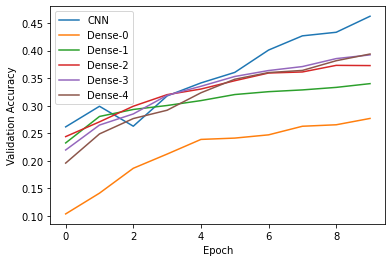

In [91]:
import matplotlib.pyplot as plt
plt.plot(history_cnn.history['val_accuracy'], label='CNN')
plt.plot(history_dense0.history['val_accuracy'], label='Dense-0')
plt.plot(history_dense1.history['val_accuracy'], label='Dense-1')
plt.plot(history_dense2.history['val_accuracy'], label='Dense-2')
plt.plot(history_dense3.history['val_accuracy'], label='Dense-3')
plt.plot(history_dense4.history['val_accuracy'], label='Dense-4')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

In the above plot, the validation accuracy for each of the dense neural networks appear to be worse than the convolutional neural network. Among the dense neural networks, it appears that the more hidden layers there are, the better the model ends up doing (and probably would continue to do if trained for more than 10 epochs). The convolutional neural network can accomodate more hidden layers while reducing the number of parameters that a dense network would need if it were to use the same number of hidden layers. 

# Question 2
Compare the accuracy achieved by rectified linear units and sigmoid units in the convolutional neural network. Modify the code above to use sigmoid units. Produce a plot that contains 2 curves (one for rectified linear units and another for sigmoid units). The y-axis is the test (validation) accuracy and the x-axis is the number of epochs. Produce curves for the first 10 epochs. Explain the results. 

In [64]:
model_sigmoid = Sequential()
model_sigmoid.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(Conv2D(32, (3, 3)))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
model_sigmoid.add(Dropout(0.25))

model_sigmoid.add(Conv2D(64, (3, 3), padding='same'))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(Conv2D(64, (3, 3)))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
model_sigmoid.add(Dropout(0.25))

model_sigmoid.add(Flatten())
model_sigmoid.add(Dense(512))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(num_classes))
model_sigmoid.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_sigmoid.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    model_sigmoid.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history_sigmoid = model_sigmoid.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.3320 - accuracy: 0.0994 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 35s 23ms/step - loss: 2.3080 - accuracy: 0.1008 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 2.3070 - accuracy: 0.1005 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.3058 - accuracy: 0.1009 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.3052 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.3050 - accuracy: 0.1013 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.3044 - ac

In [ ]:
# Save model and weights
model_name = 'keras_cifar10_trained_model_sigmoid.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


In [65]:
scores = model_sigmoid.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 2.3030 - accuracy: 0.1000
Test loss: 2.302999496459961
Test accuracy: 0.10000000149011612


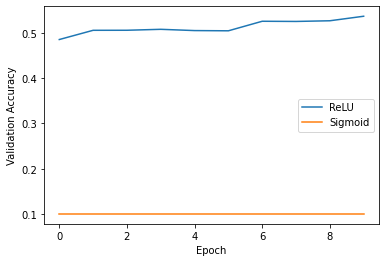

In [66]:
plt.plot(history_cnn.history['val_accuracy'], label="ReLU")
plt.plot(history_sigmoid.history['val_accuracy'], label="Sigmoid")
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

The above plot of the first 10 epochs shows that the ReLU CNN model way outperforms the sigmoid CNN model. ReLU activation functions help the model converge faster than with sigmoid functions, so it makes sense that ReLU has faster increasing validation accuracy for every epoch when compared to the model with sigmoid activations. Using ReLU removes the issue of vanishing gradients. This problem affects the earlier layers in a deep neural network (since the maximum of the derivative of a sigmoid is .25 which would decreases the gradients exponentially). So when using sigmoid activiations, the gradients become very small which results in smaller and smaller changes to the weights so that they essentially become fixed and never change. Therefore, if the model doesn't perform well from the start, the validation accuracy isn't going to improve much at all even with more training epochs. 


# Question 3
Compare the accuracy achieved with and without dropout as well as with and without data augmentation in the convolutional neural network. Modify the code above to turn on and off dropout as well as data augmentation. Produce 2 graphs (one for training accuracy and one for test accuracy) that each contains 4 curves (with and without dropout as well as with and without data augmentation). Produce curves for as many epochs as you can up to 100 epochs. 

In [74]:
# Parameters
epochs=100
data_augmentation=True

model_dropout_aug = Sequential()
model_dropout_aug.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_dropout_aug.add(Activation('relu'))
model_dropout_aug.add(Conv2D(32, (3, 3)))
model_dropout_aug.add(Activation('relu'))
model_dropout_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_aug.add(Dropout(0.5))

model_dropout_aug.add(Conv2D(64, (3, 3), padding='same'))
model_dropout_aug.add(Activation('relu'))
model_dropout_aug.add(Conv2D(64, (3, 3)))
model_dropout_aug.add(Activation('relu'))
model_dropout_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_aug.add(Dropout(0.5))

model_dropout_aug.add(Flatten())
model_dropout_aug.add(Dense(512))
model_dropout_aug.add(Activation('relu'))
model_dropout_aug.add(Dropout(0.5))
model_dropout_aug.add(Dense(num_classes))
model_dropout_aug.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_dropout_aug.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    model_dropout_aug.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history_dropout_aug = model_dropout_aug.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/100
1563/1563 [==============================] - 35s 22ms/step - loss: 2.1873 - accuracy: 0.1813 - val_loss: 2.0136 - val_accuracy: 0.2659
Epoch 2/100
1563/1563 [==============================] - 34s 22ms/step - loss: 2.0440 - accuracy: 0.2506 - val_loss: 1.9537 - val_accuracy: 0.2856
Epoch 3/100
1563/1563 [==============================] - 34s 22ms/step - loss: 2.0077 - accuracy: 0.2616 - val_loss: 2.0005 - val_accuracy: 0.2652
Epoch 4/100
1563/1563 [==============================] - 35s 22ms/step - loss: 1.9683 - accuracy: 0.2812 - val_loss: 1.8543 - val_accuracy: 0.3375
Epoch 5/100
1563/1563 [==============================] - 34s 22ms/step - loss: 1.9041 - accuracy: 0.3088 - val_loss: 1.7848 - val_accuracy: 0.3656
Epoch 6/100
1563/1563 [==============================] - 35s 22ms/step - loss: 1.8436 - accuracy: 0.3334 - val_loss: 1.7030 - val_accuracy: 0.3909
Epoch 7/100
1563/1563 [==============================] - 35s 22ms/step - loss: 1.79

In [75]:
# Save model and weights
model_name = 'keras_cifar10_trained_model_dropout_aug.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at /content/drive/My Drive/Colab Notebooks/saved_models/keras_cifar10_trained_model_dropout_aug.h5 


In [68]:
# Parameters
epochs=100
data_augmentation=False

model_dropout_no_aug = Sequential()
model_dropout_no_aug.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_dropout_no_aug.add(Activation('relu'))
model_dropout_no_aug.add(Conv2D(32, (3, 3)))
model_dropout_no_aug.add(Activation('relu'))
model_dropout_no_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_no_aug.add(Dropout(0.5))

model_dropout_no_aug.add(Conv2D(64, (3, 3), padding='same'))
model_dropout_no_aug.add(Activation('relu'))
model_dropout_no_aug.add(Conv2D(64, (3, 3)))
model_dropout_no_aug.add(Activation('relu'))
model_dropout_no_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_no_aug.add(Dropout(0.5))

model_dropout_no_aug.add(Flatten())
model_dropout_no_aug.add(Dense(512))
model_dropout_no_aug.add(Activation('relu'))
model_dropout_no_aug.add(Dropout(0.5))
model_dropout_no_aug.add(Dense(num_classes))
model_dropout_no_aug.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_dropout_no_aug.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    history_dropout_no_aug = model_dropout_no_aug.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history_dropout_no_aug = model_dropout_no_aug.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Not using data augmentation.
Epoch 1/100
1563/1563 [==============================] - 11s 7ms/step - loss: 2.1923 - accuracy: 0.1813 - val_loss: 2.0217 - val_accuracy: 0.2733
Epoch 2/100
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0262 - accuracy: 0.2612 - val_loss: 1.9834 - val_accuracy: 0.2791
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9531 - accuracy: 0.2939 - val_loss: 1.8855 - val_accuracy: 0.3182
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8812 - accuracy: 0.3210 - val_loss: 1.8168 - val_accuracy: 0.3483
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8223 - accuracy: 0.3424 - val_loss: 1.8929 - val_accuracy: 0.3290
Epoch 6/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7741 - accuracy: 0.3601 - val_loss: 1.7236 - val_accuracy: 0.3813
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7337 - accuracy

In [76]:
# Save model and weights
model_name = 'keras_cifar10_trained_model_dropout_no_aug.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at /content/drive/My Drive/Colab Notebooks/saved_models/keras_cifar10_trained_model_dropout_no_aug.h5 


In [69]:
# Parameters
epochs=100
data_augmentation=False

model_no_dropout_no_aug = Sequential()
model_no_dropout_no_aug.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_no_dropout_no_aug.add(Activation('relu'))
model_no_dropout_no_aug.add(Conv2D(32, (3, 3)))
model_no_dropout_no_aug.add(Activation('relu'))
model_no_dropout_no_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_no_dropout_no_aug.add(Conv2D(64, (3, 3), padding='same'))
model_no_dropout_no_aug.add(Activation('relu'))
model_no_dropout_no_aug.add(Conv2D(64, (3, 3)))
model_no_dropout_no_aug.add(Activation('relu'))
model_no_dropout_no_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_no_dropout_no_aug.add(Flatten())
model_no_dropout_no_aug.add(Dense(512))
model_no_dropout_no_aug.add(Activation('relu'))

model_no_dropout_no_aug.add(Dense(num_classes))
model_no_dropout_no_aug.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_no_dropout_no_aug.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    history_no_dropout_no_aug = model_no_dropout_no_aug.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history_no_dropout_no_aug = model_no_dropout_no_aug.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Not using data augmentation.
Epoch 1/100
1563/1563 [==============================] - 10s 7ms/step - loss: 2.0986 - accuracy: 0.2342 - val_loss: 1.9675 - val_accuracy: 0.2954
Epoch 2/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.9395 - accuracy: 0.3069 - val_loss: 1.8549 - val_accuracy: 0.3423
Epoch 3/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.8270 - accuracy: 0.3492 - val_loss: 1.7631 - val_accuracy: 0.3777
Epoch 4/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7408 - accuracy: 0.3815 - val_loss: 1.7182 - val_accuracy: 0.3841
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6713 - accuracy: 0.4057 - val_loss: 1.6220 - val_accuracy: 0.4227
Epoch 6/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6079 - accuracy: 0.4276 - val_loss: 1.5525 - val_accuracy: 0.4498
Epoch 7/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5516 - accuracy

In [77]:
# Save model and weights
model_name = 'keras_cifar10_trained_model_no_dropout_no_aug.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at /content/drive/My Drive/Colab Notebooks/saved_models/keras_cifar10_trained_model_no_dropout_no_aug.h5 


In [70]:
# Parameters
epochs=100
data_augmentation=True

model_no_dropout_aug = Sequential()
model_no_dropout_aug.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_no_dropout_aug.add(Activation('relu'))
model_no_dropout_aug.add(Conv2D(32, (3, 3)))
model_no_dropout_aug.add(Activation('relu'))
model_no_dropout_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_no_dropout_aug.add(Conv2D(64, (3, 3), padding='same'))
model_no_dropout_aug.add(Activation('relu'))
model_no_dropout_aug.add(Conv2D(64, (3, 3)))
model_no_dropout_aug.add(Activation('relu'))
model_no_dropout_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_no_dropout_aug.add(Flatten())
model_no_dropout_aug.add(Dense(512))
model_no_dropout_aug.add(Activation('relu'))

model_no_dropout_aug.add(Dense(num_classes))
model_no_dropout_aug.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_no_dropout_aug.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    history_no_dropout_aug = model_no_dropout_aug.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history_no_dropout_aug = model_no_dropout_aug.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/100
1563/1563 [==============================] - 36s 23ms/step - loss: 2.1196 - accuracy: 0.2217 - val_loss: 1.9706 - val_accuracy: 0.2881
Epoch 2/100
1563/1563 [==============================] - 36s 23ms/step - loss: 1.9663 - accuracy: 0.2856 - val_loss: 1.8285 - val_accuracy: 0.3509
Epoch 3/100
1563/1563 [==============================] - 35s 23ms/step - loss: 1.8305 - accuracy: 0.3370 - val_loss: 1.6952 - val_accuracy: 0.3960
Epoch 4/100
1563/1563 [==============================] - 35s 23ms/step - loss: 1.7499 - accuracy: 0.3695 - val_loss: 1.6593 - val_accuracy: 0.4076
Epoch 5/100
1563/1563 [==============================] - 35s 23ms/step - loss: 1.6953 - accuracy: 0.3917 - val_loss: 1.5792 - val_accuracy: 0.4415
Epoch 6/100
1563/1563 [==============================] - 35s 22ms/step - loss: 1.6476 - accuracy: 0.4071 - val_loss: 1.5475 - val_accuracy: 0.4467
Epoch 7/100
1563/1563 [==============================] - 35s 23ms/step - loss: 1.59

In [78]:
# Save model and weights
model_name = 'keras_cifar10_trained_model_no_dropout_aug.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at /content/drive/My Drive/Colab Notebooks/saved_models/keras_cifar10_trained_model_no_dropout_aug.h5 


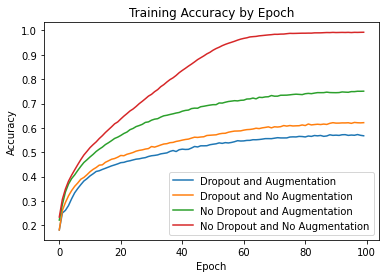

In [83]:
plt.plot(history_dropout_aug.history['accuracy'], label='Dropout and Augmentation')
plt.plot(history_dropout_no_aug.history['accuracy'], label='Dropout and No Augmentation')
plt.plot(history_no_dropout_aug.history['accuracy'], label='No Dropout and Augmentation')
plt.plot(history_no_dropout_no_aug.history['accuracy'], label='No Dropout and No Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training Accuracy by Epoch')
plt.legend()

In the training accuracy plot, consider the two models that included dropout. The model without any data augmentation has higher training accuracy when compared to the model to the model that did have data augmentation. Since there are fewer training examples in the model without data augmentation, it makes sense the model would learn more because there's less to learn. Similar phenomenon occur for the two models without dropout when comparing whether or not the model had data augmentation. If we want to compare models with dropout versus models without dropout, first consider the two models with data augmentation. The model with dropout learned less than the model without dropout. The same thing happens with the no data augmentation models. This also makes sense, because models without dropout are more at risk for overfitting to the training data than models with dropout. 

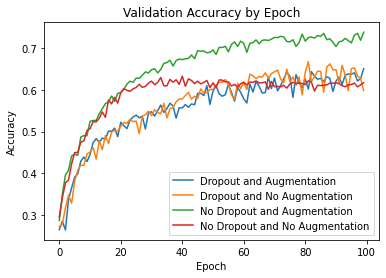

In [84]:
plt.plot(history_dropout_aug.history['val_accuracy'], label='Dropout and Augmentation')
plt.plot(history_dropout_no_aug.history['val_accuracy'], label='Dropout and No Augmentation')
plt.plot(history_no_dropout_aug.history['val_accuracy'], label='No Dropout and Augmentation')
plt.plot(history_no_dropout_no_aug.history['val_accuracy'], label='No Dropout and No Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Validation Accuracy by Epoch')
plt.legend()

Consider the models with data augmentation versus those without data augmentation. For the models with dropout, the data augmentation doesn't seem to make too much of a difference across the epochs. Whatever benefit data augmentation may have gets overshadowed by dropout. This makes sense because dropout may be seen as a form of data augmentation (see https://arxiv.org/pdf/1506.08700.pdf), so the extra data augmentation may just have a redundant effect. For the models without dropout, the model with data augmentation appears to perform significantly better than the model without data augmentation. This illustrates the idea that data augmentation helps to prevent overfitting (just like dropout). Without data augmentation, the model seems to overfit the data.  